<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/tensorflow/MediaPipe_Face_Mesh_TFLite_Python_Direct_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### References,

https://github.com/shortcipher3/stackoverflow/blob/master/mediapipe_iris_2d_landmarks.ipynb

### Model card,

https://drive.google.com/file/d/1QvwWNfFoweGVjsXF3DXzcrCnz-mx-Lha/view

# Details,

Input to model is 192x192, so image should be resized the same. Image should be a crop of a face with 25% more area all around.

In [1]:
!wget "https://github.com/google/mediapipe/raw/master/mediapipe/modules/face_landmark/face_landmark.tflite"

--2021-04-15 12:05:49--  https://github.com/google/mediapipe/raw/master/mediapipe/modules/face_landmark/face_landmark.tflite
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/face_landmark/face_landmark.tflite [following]
--2021-04-15 12:05:50--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/face_landmark/face_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2439276 (2.3M) [application/octet-stream]
Saving to: ‘face_landmark.tflite’

face_landmark.tflit 100%[===================>]   2.33M  --.-KB/s    in 0.1s    

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
print(tf.__version__)

2.4.1


In [4]:
model_file = '/content/face_landmark.tflite'

interpreter = tf.lite.Interpreter(
    model_path=model_file)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f'input_details {input_details}')
print(f'output_details {output_details}')

# check the type of the input tensor
floating_model = input_details[0]['dtype'] == np.float32
print(f'is floating model: {floating_model}')

# NxHxWxC, H:1, W:2
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

input_details [{'name': 'input_1', 'index': 0, 'shape': array([  1, 192, 192,   3], dtype=int32), 'shape_signature': array([  1, 192, 192,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details [{'name': 'conv2d_21', 'index': 213, 'shape': array([   1,    1,    1, 1404], dtype=int32), 'shape_signature': array([   1,    1,    1, 1404], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'conv2d_31', 'index': 210, 'shape': array([1, 1, 1, 1], dtype=int32), 'shape_signature': array([1, 1, 1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': arr

## Test on sample image

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
!wget "https://peoplepill.com/media/people/thumbs/G/geoffrey-hinton.jpg" -O "hinton.jpg"

--2021-04-15 12:05:53--  https://peoplepill.com/media/people/thumbs/G/geoffrey-hinton.jpg
Resolving peoplepill.com (peoplepill.com)... 172.64.163.26, 172.64.162.26, 2606:4700:e4::ac40:a31a, ...
Connecting to peoplepill.com (peoplepill.com)|172.64.163.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8993 (8.8K) [image/jpeg]
Saving to: ‘hinton.jpg’

hinton.jpg          100%[===================>]   8.78K  --.-KB/s    in 0s      

2021-04-15 12:05:53 (58.3 MB/s) - ‘hinton.jpg’ saved [8993/8993]



In [7]:
image = cv2.imread('hinton.jpg')

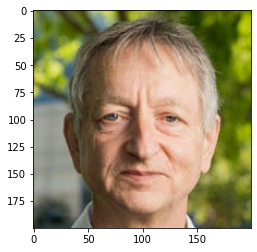

In [8]:
plt.imshow(image[:,:,::-1])

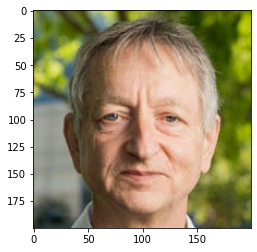

In [9]:
image_cropped = image[:image.shape[0], :image.shape[0], ::-1] # crop to avoid letterboxing step
plt.imshow(image_cropped)

In [10]:
img = cv2.resize(image_cropped, (192, 192))[np.newaxis, :, :, :]
img = (np.float32(img) - 0.0) / 255.0  # normalization (specified in tflite_converter_calculator, not in model card)

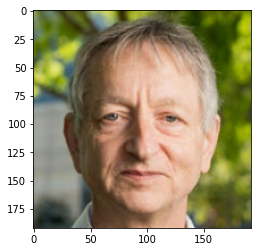

In [11]:
plt.imshow(img.squeeze())

In [12]:
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output_face_landmarks = interpreter.get_tensor(output_details[0]['index'])[0]
output_face_flag = interpreter.get_tensor(output_details[1]['index'])[0]  # Most likely this is the face flag as written in model card 

In [13]:
print(output_face_flag)

[[[25.370535]]]


In [14]:
print(output_face_landmarks.squeeze()[0:9])
print(output_face_landmarks.squeeze().shape)

output_face_landmarks = tf.reshape(tensor=output_face_landmarks, shape=(468,3))
print(output_face_landmarks)
#print(output_face_landmarks[:, 0:1])


face_landmark_x = output_face_landmarks[:, 0:1]
face_landmark_y = output_face_landmarks[:, 1:2]
#face_landmark_z = output_face_landmarks[:, 2:3]

[ 96.56539  140.09276  -13.287317  96.033936 124.829056 -24.666355
  96.20232  129.73438  -13.201663]
(1404,)
tf.Tensor(
[[ 96.56539   140.09276   -13.287317 ]
 [ 96.033936  124.829056  -24.666355 ]
 [ 96.20232   129.73438   -13.201663 ]
 ...
 [104.74114    97.97416    -2.4057379]
 [130.67671    94.612274    5.939166 ]
 [133.26791    93.06469     5.99217  ]], shape=(468, 3), dtype=float32)


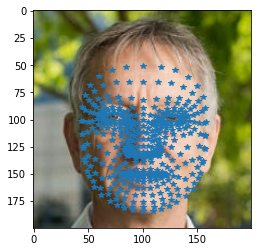

In [15]:
# cropped image
plt.imshow(image_cropped)
plt.plot(face_landmark_x/192.0*image_cropped.shape[0], (face_landmark_y/192.0)*image_cropped.shape[1], '*')

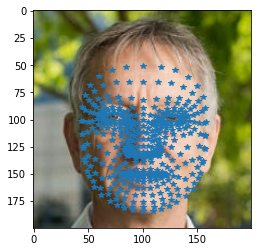

In [16]:
# original image
plt.imshow(image[:,:,::-1])
plt.plot(face_landmark_x/192.0*image_cropped.shape[0], (face_landmark_y/192.0)*image_cropped.shape[1], '*')